In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = (
    pd.read_csv(
        '../data/cars.csv',
    )
    .assign(
        manufacturer = lambda df: df.manufacturer.astype('category'),
        model = lambda df: df.model.astype('category'),
        year = lambda df: df.year.astype('int'),
        transmission = lambda df: df.transmission.astype('category'),
    )
)

In dieser Arbeit geht es um die Vorhersage von Autopreisen auf der Grundlage eines Datensatzes von Kaggle^[<https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset?resource=download>]. Wir werden verschiedene Modelle und Methoden unter Verwendung der Python-Bibliothek Sklearn^[<https://scikit-learn.org/stable/>] und statmodels^[<https://www.statsmodels.org/stable/index.html>] ausprobieren. Das Benchmark-Modell wird die lineare Regression sein, alle anderen Modelle werden mit diesem Modell verglichen. 

Zum Ablauf: Zuerst werden die Daten importiert und bereinigt, dann werden die Daten in train-test-split Verfahren aufgeteilt. Der grosse Teil, `train`, wird zum Trainieren des Modells verwendet, während der kleine Teil, `test`, zur Überprüfung der Leistung verwendet wird.

In [8]:
df.head(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


<Figure size 640x480 with 0 Axes>

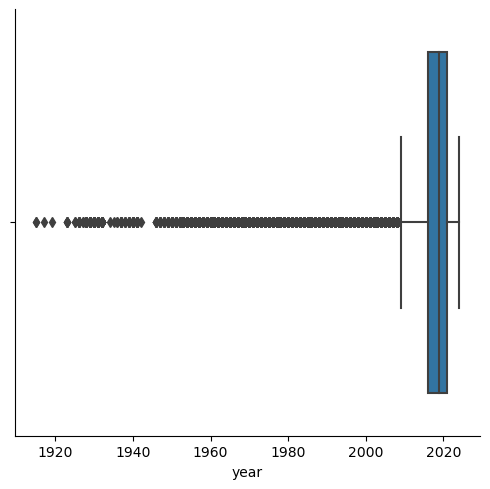

In [17]:
plt.figure()
sns.catplot(
    data = df,
    x = 'year',
    kind = 'box',

)
